# Import Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')


from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import pydotplus
from IPython.display import Image  

# Read the Data


In [72]:
df =  pd.read_csv('Mobile Price Prediction.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [73]:
df.shape

(2000, 21)

In [74]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [75]:
df.std()

battery_power     439.418206
blue                0.500100
clock_speed         0.816004
dual_sim            0.500035
fc                  4.341444
four_g              0.499662
int_memory         18.145715
m_dep               0.288416
mobile_wt          35.399655
n_cores             2.287837
pc                  6.064315
px_height         443.780811
px_width          432.199447
ram              1084.732044
sc_h                4.213245
sc_w                4.356398
talk_time           5.463955
three_g             0.426273
touch_screen        0.500116
wifi                0.500076
price_range         1.118314
dtype: float64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [77]:
df.price_range= df.price_range.replace({0:'Low',1:'Low',2:'High',3:'High'})

In [78]:
df.price_range.replace(('High','Low'),(1,0),inplace=True)

In [79]:
df.price_range.value_counts()

1    1000
0    1000
Name: price_range, dtype: int64

In [80]:
df.to_csv('mobile_price.csv')

In [81]:
df.to_csv(r'C:\Users\somu\Desktop\mobile_price.csv', index=False)

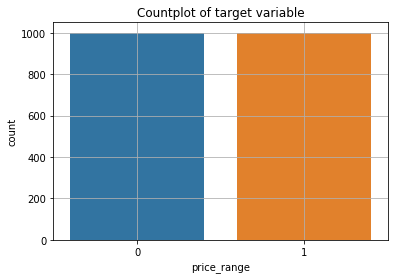

In [10]:
#Ploting  the distribution of the target variable.
sns.countplot(df['price_range'])
plt.title("Countplot of target variable")
plt.grid(True)
plt.show()

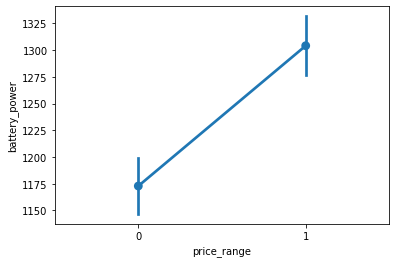

In [11]:
sns.pointplot(x='price_range',y='battery_power',data=df)

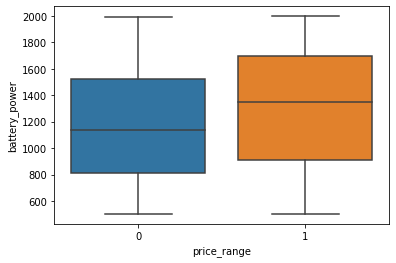

In [12]:
sns.boxplot(x='price_range',y='battery_power',data=df)


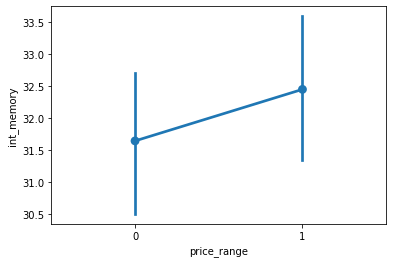

In [13]:
sns.pointplot(x='price_range',y='int_memory',data=df)


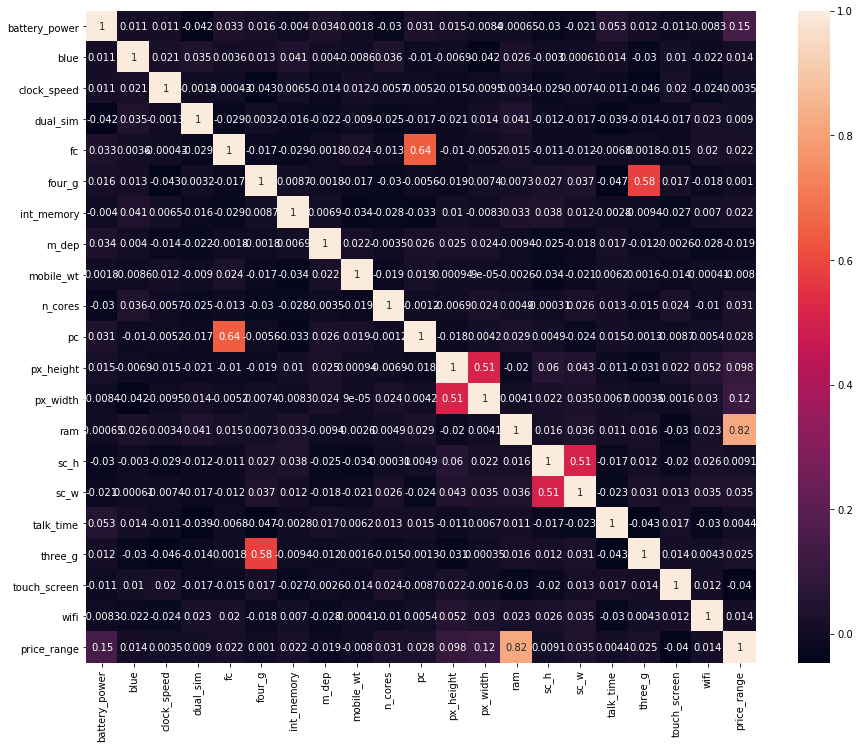

In [14]:
fig = plt.figure(figsize=(15,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot =True)

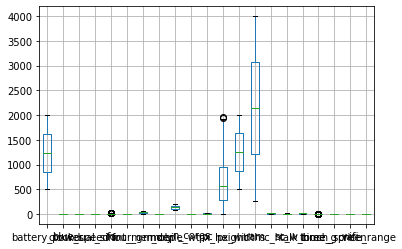

In [15]:
# Ploting a box plot to detect the outlair

df.boxplot()

In [16]:
# Outlair Detaction using IQR method
Q1 = df.drop(['price_range'], axis=1).quantile(0.25)

Q3 = df.drop(['price_range'], axis=1).quantile(0.75)


IQR = Q3 - Q1

print(IQR)

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

battery_power     763.50
blue                1.00
clock_speed         1.50
dual_sim            1.00
fc                  6.00
four_g              1.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
three_g             0.00
touch_screen        1.00
wifi                1.00
dtype: float64


In [17]:
df.shape

(1506, 21)

In [18]:
df.std()

battery_power     439.152661
blue                0.499972
clock_speed         0.813850
dual_sim            0.500138
fc                  4.215837
four_g              0.464831
int_memory         18.218391
m_dep               0.287849
mobile_wt          35.143590
n_cores             2.276619
pc                  6.059893
px_height         435.280087
px_width          428.973230
ram              1084.554839
sc_h                4.213579
sc_w                4.417835
talk_time           5.433910
three_g             0.000000
touch_screen        0.500130
wifi                0.500138
price_range         0.500122
dtype: float64

### Confusion matrix (heatmap)  roc-auc curve.


In [19]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for bank ', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)


def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

# Model creation


#### Standard Scalar for Naive_bayes and KNN.


In [20]:
df_target = df['price_range']
X = df.drop('price_range', axis = 1)

In [21]:
ss = StandardScaler()

num_scaled = ss.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_scaled, df_target, test_size=0.25, random_state=123,stratify=df_target)

print("Training size = " + str(X_train.shape[0]))
print("Testing size = " + str(X_test.shape[0]))

Training size = 1129
Testing size = 377


# Naive_bayes


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
cv_score = cross_val_score(gnb, X_train, y_train, cv=10)
gnb_score = cv_score.mean()
print('Gaussian Naive Bayes Average Score:')
print()
print(gnb_score)


Gaussian Naive Bayes Average Score:

0.9273625158027812


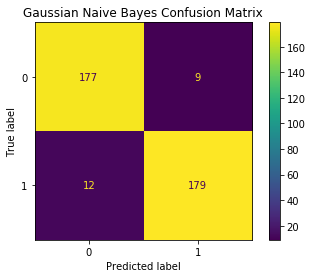

Gaussian Naive Bayes Model Accuracy (on testing set): 
0.9442970822281167


In [24]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

GNB = GaussianNB()
GNB_model = GNB.fit(X_train, y_train)
y_pred = GNB_model.predict(X_test)

disp = plot_confusion_matrix(GNB_model, X_test, y_test)
disp.ax_.set_title('Gaussian Naive Bayes Confusion Matrix')

plt.show()
print('Gaussian Naive Bayes Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

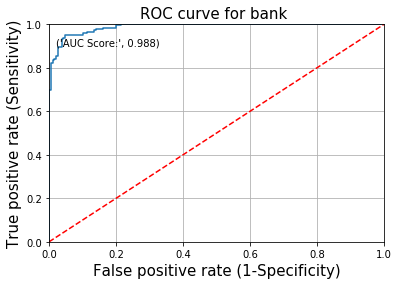

In [25]:
plot_roc(GNB_model)

In [26]:
test_report = get_test_report(GNB_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       186
           1       0.95      0.94      0.94       191

    accuracy                           0.94       377
   macro avg       0.94      0.94      0.94       377
weighted avg       0.94      0.94      0.94       377



# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cv_score = cross_val_score(knn, X_train, y_train, cv=10)
knn_score = cv_score.mean()
print('KNN Average Score:')
print()
print(knn_score)

KNN Average Score:

0.8193426042983566


In [ ]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn_classification = KNeighborsClassifier(n_jobs=-1)
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 3, 
                        scoring = 'accuracy', 
                        n_jobs=-1)
knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid

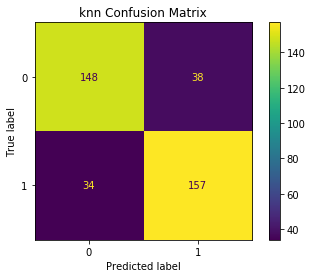

knn Model Accuracy (on testing set): 
0.8090185676392573


In [28]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

disp = plot_confusion_matrix(knn_model, X_test, y_test)
disp.ax_.set_title('knn Confusion Matrix')

plt.show()
print('knn Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

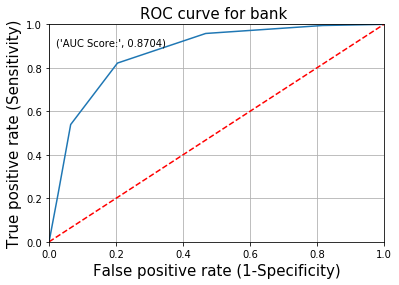

In [29]:
plot_roc(knn_model)

In [30]:
test_report = get_test_report(knn_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       186
           1       0.81      0.82      0.81       191

    accuracy                           0.81       377
   macro avg       0.81      0.81      0.81       377
weighted avg       0.81      0.81      0.81       377



# LOGISTIC REGRESSION


In [64]:
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Xc = sm.add_constant(num_scaled)
X_train, X_test, y_train, y_test = train_test_split(Xc, df_target, test_size=0.25, random_state=123,stratify=df_target)

lr = LogisticRegression(max_iter = 10000)
cv_score = cross_val_score(lr, X_train, y_train, cv=10)
lr_score = cv_score.mean()
print('Logistic Regression Average Score:')
print()
print(lr_score)

Logistic Regression Average Score:

0.9840707964601769


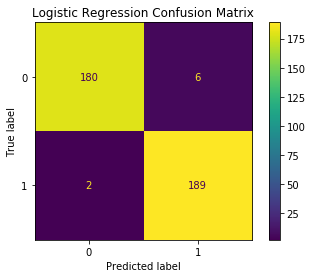

Logistic Regression Model Accuracy (on testing set): 
0.9787798408488063


In [32]:
lr = LogisticRegression(max_iter = 10000)
lr_model = lr.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

disp = plot_confusion_matrix(lr_model, X_test, y_test)
disp.ax_.set_title('Logistic Regression Confusion Matrix')

plt.show()
print('Logistic Regression Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

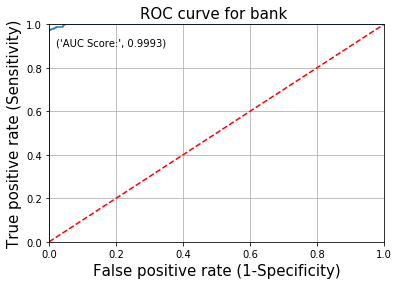

In [33]:
plot_roc(lr_model)

In [34]:
test_report = get_test_report(lr_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       186
           1       0.97      0.99      0.98       191

    accuracy                           0.98       377
   macro avg       0.98      0.98      0.98       377
weighted avg       0.98      0.98      0.98       377



### Split again for Unscaled data

In [35]:
df_target = df['price_range']
x = df.drop('price_range', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, df_target, test_size=0.25, random_state=123,stratify=df_target)
print("Training size = " + str(x_train.shape[0]))
print("Testing size = " + str(x_test.shape[0]))

Training size = 1129
Testing size = 377


In [36]:
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(x_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

# DECISION TREE


In [37]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tuned_parameters =[{'criterion':['gini','entropy']}]
dtc =DecisionTreeClassifier(random_state=1)
tree_grid = GridSearchCV(estimator=dtc,
                        param_grid = tuned_parameters,
                        cv=5)
dt_grid = tree_grid.fit(x_train,y_train)
print('Best parameter for decision tree classifier: ',dt_grid.best_params_, '\n')

Best parameter for decision tree classifier:  {'criterion': 'entropy'} 



In [38]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv_score = cross_val_score(dt, X_train, y_train, cv=10)
dt_score = cv_score.mean()
print('Decision Tree Average Score:')
print()
print(dt_score)

Decision Tree Average Score:

0.9406526548672567


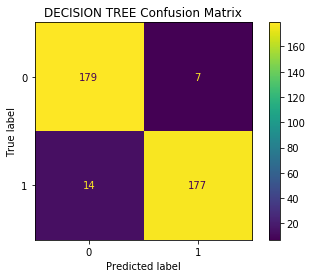

DECISION TREE Model Accuracy (on testing set): 
0.9442970822281167


In [39]:
dt = tree.DecisionTreeClassifier(random_state = 1)
dt_model = dt.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

disp = plot_confusion_matrix(dt_model, x_test, y_test)
disp.ax_.set_title('DECISION TREE Confusion Matrix')

plt.show()
print('DECISION TREE Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

In [40]:
test_report = get_test_report(dt_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       186
           1       0.96      0.93      0.94       191

    accuracy                           0.94       377
   macro avg       0.94      0.94      0.94       377
weighted avg       0.94      0.94      0.94       377



# Random Forest


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 1)
cv_score = cross_val_score(rf, x_train, y_train, cv=10)
rf_score = cv_score.mean()

print('Random Forest Average Score:')
print()
print(rf_score)

Random Forest Average Score:

0.9468394437420985


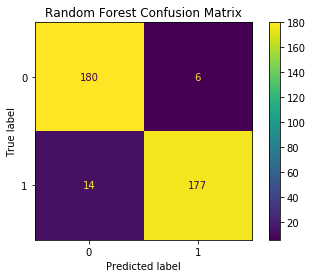

Random Forest Model Accuracy (on testing set): 
0.946949602122016


In [42]:
rf = RandomForestClassifier(random_state = 1)
rf_model = rf.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
disp = plot_confusion_matrix(rf_model, x_test, y_test)
disp.ax_.set_title('Random Forest Confusion Matrix')

plt.show()

print('Random Forest Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

In [43]:
test_report = get_test_report(rf_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       186
           1       0.97      0.93      0.95       191

    accuracy                           0.95       377
   macro avg       0.95      0.95      0.95       377
weighted avg       0.95      0.95      0.95       377



In [44]:
rf = RandomForestClassifier(random_state = 1)
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)

precision=cm[1,1]/(cm[1,1]+cm[0,1])
print(precision)
sensitivity=cm[1,1]/(cm[1,1]+cm[1,0])

print(sensitivity)

0.9627659574468085
0.9476439790575916


# XGBoost

In [45]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1,verbosity=0)
xgb_model.fit(x_train, y_train)
y_test_pred6 = xgb_model.predict(x_test)
y_train_pred6=xgb_model.predict(x_train)
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred6,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred6,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred6,y_test))

Test Set Accuracy:97.34748010610079

Confusion Matrix:
[[183   7]
 [  3 184]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       190
           1       0.96      0.98      0.97       187

    accuracy                           0.97       377
   macro avg       0.97      0.97      0.97       377
weighted avg       0.97      0.97      0.97       377



In [63]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1,verbosity=0)
score=cross_val_score(xgb_model, x_train, y_train, cv=10)
score=score.mean()
print("Accuracy after 10 fold cross validation:", score)

Accuracy after 10 fold cross validation: 0.9672329329962073


In [69]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4],'n_estimators': range(1,99) }

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test se

In [70]:
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

KeyboardInterrupt: 

# AdaBoostClassifier

In [48]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(x_train, y_train)
y_test_pred4 = ada_model.predict(x_test)
y_train_pred4=ada_model.predict(x_train)
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred4,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred4,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred4,y_test))


Test Set Accuracy:97.87798408488064

Confusion Matrix:
[[184   6]
 [  2 185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       190
           1       0.97      0.99      0.98       187

    accuracy                           0.98       377
   macro avg       0.98      0.98      0.98       377
weighted avg       0.98      0.98      0.98       377



In [49]:
ada_model = AdaBoostClassifier()
score1=cross_val_score(ada_model, x_train, y_train, cv=10)
score1=score.mean()
print("Accuracy after 10 fold cross validation:", score1)

Accuracy after 10 fold cross validation: 0.9663558786346398


# GradientBoostingClassifier

In [50]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model.fit(x_train, y_train)
y_test_pred5 = gboost_model.predict(x_test)
y_train_pred5=gboost_model.predict(x_train)
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred5,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred5,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred5,y_test))

Test Set Accuracy:94.9602122015915

Confusion Matrix:
[[179  12]
 [  7 179]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       191
           1       0.94      0.96      0.95       186

    accuracy                           0.95       377
   macro avg       0.95      0.95      0.95       377
weighted avg       0.95      0.95      0.95       377



In [51]:
gboost_model = GradientBoostingClassifier()
score2=cross_val_score(gboost_model, x_train, y_train, cv=10)
score2=score.mean()
print("Accuracy after 10 fold cross validation:", score2)

Accuracy after 10 fold cross validation: 0.9663558786346398


## Best performing models


In [52]:
scores = [['Gaussian Naive Bayes', gnb_score],
          ['K-Nearest Neighbor', knn_score],
          ['Logistic Regression', lr_score],
          ['Decision Tree', dt_score],
          ['Random Forest', rf_score],
         ['XGB Classifier',score],
         ['AdaBoost Classifier',score1],
         ['Gradient Boosting Classifier',score2]]
 

df_scores = pd.DataFrame(scores,
                         columns = ['Model', 'Score Average']
                        )
df_scores

,Model,Score Average
0,Gaussian Naive Bayes,0.927363
1,K-Nearest Neighbor,0.819343
2,Logistic Regression,0.984071
3,Decision Tree,0.940653
4,Random Forest,0.946839
5,XGB Classifier,0.966356
6,AdaBoost Classifier,0.966356
7,Gradient Boosting Classifier,0.966356
